In [24]:
#mport Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Ignore SQLITE warnings related to Decimal numbers in the hawaii database
import warnings
warnings.filterwarnings('ignore')

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [28]:
#engine.execute('SELECT * FROM hawaii LIMIT 5').fetchall()

In [12]:
# reflect an existing database into a new model

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# reflect the tables


['measurement', 'station']

In [30]:
#Renaming the DB Table
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [31]:
# View all of the classes that automap found


inspector = inspect(engine)
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# View all of the classes that automap found


inspector = inspect(engine)
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [32]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
recentdate = session.query(measurement.date).order_by (measurement.date.desc()).first()
recentdate
# Design a query to calculate the PTP for stock `IBM` after May, 2011
#import datetime as dt

#date = dt.datetime(2011, 5, 31)

('2017-08-23')

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.

lastdate_l= dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
lastdate_l
# Perform a query to retrieve the date and precipitation scores
date_prec = session.query(measurement.date, measurement.prcp).filter(measurement.date>= lastdate_l).all()
date_prec
# Save the query results as a Pandas DataFrame and set the index to the date column

date_prec_df =pd.DataFrame(date_prec)
date_prec_df.set_index('date', inplace=True)
# Sort the dataframe by date
date_prec_df.sort_index(inplace=True)
date_prec_df

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


<AxesSubplot:xlabel='date'>

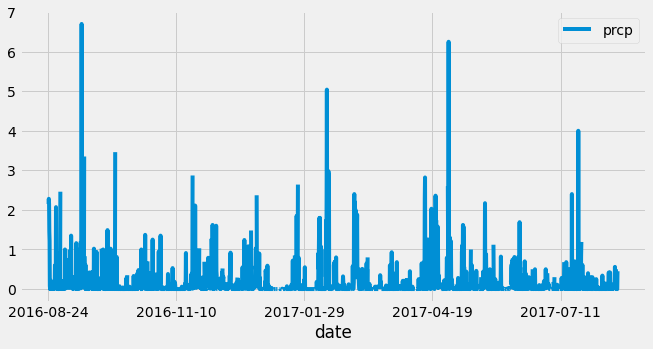

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data

date_prec_df.plot(figsize=(10, 5))

## Plot the Results in a Matplotlib bar chart
##df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
##df.set_index('stock', inplace=True)
##df.plot.bar()
##plt.tight_layout()
##plt.show()

In [44]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prec_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number stations in the dataset
stations_no=session.query(station.id).count()
stations_no

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

activestation=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()) 
activestation
# List the stations and the counts in descending order.
for station in activestation:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_t=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station==activestation[0][0])
lowest_t[0][0], lowest_t[0][1], lowest_t[0][2]

(54.0, 85.0, 71.66378066378067)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()